In [1]:
import numpy as np
import torchvision
import time
import os
import copy
import pdb
import time
import argparse

import sys
import cv2

import torch
from torch.utils.data import Dataset, DataLoader
from torchvision import datasets, models, transforms

from retinanet.dataloader import CocoDataset, CSVDataset, collater, Resizer, AspectRatioBasedSampler, Augmenter, \
	UnNormalizer, Normalizer

In [7]:
from retinanet import model

In [8]:
device = torch.device('cpu')

In [9]:
retinanet = model.resnet50(num_classes=80)

#retinanet = torch.load('coco_resnet_50_map_0_335_state_dict.pt',map_location=torch.device('cpu'))

In [12]:
retinanet.load_state_dict(torch.load('coco_resnet_50_map_0_335_state_dict.pt',map_location=torch.device('cpu')))


<All keys matched successfully>

In [13]:
retinanet = torch.nn.DataParallel(retinanet)
retinanet.eval()

DataParallel(
  (module): ResNet(
    (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (relu): ReLU(inplace=True)
    (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (layer1): Sequential(
      (0): Bottleneck(
        (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu): ReLU(inplace=True)
        (downsample): Sequential(
      

In [14]:
from PIL import Image
from torchvision import transforms as tf

In [15]:
img = Image.open('/Users/rsingh/Packages/darknet/data/dog.jpg')

In [16]:
img_tf = tf.ToTensor()(img).unsqueeze(0)

In [17]:
img_tf.to(device)

tensor([[[[0.2235, 0.2275, 0.2353,  ..., 0.5608, 0.3490, 0.2549],
          [0.2275, 0.2275, 0.2314,  ..., 0.4863, 0.3294, 0.2275],
          [0.2275, 0.2275, 0.2314,  ..., 0.3843, 0.3059, 0.1725],
          ...,
          [0.6275, 0.6275, 0.6392,  ..., 0.3137, 0.2078, 0.2431],
          [0.6314, 0.6275, 0.6118,  ..., 0.3098, 0.2118, 0.2627],
          [0.6157, 0.6235, 0.6000,  ..., 0.3137, 0.2000, 0.1961]],

         [[0.2275, 0.2314, 0.2392,  ..., 0.3490, 0.1922, 0.2745],
          [0.2314, 0.2314, 0.2353,  ..., 0.2941, 0.1961, 0.2745],
          [0.2314, 0.2314, 0.2353,  ..., 0.2118, 0.2078, 0.2471],
          ...,
          [0.6588, 0.6588, 0.6706,  ..., 0.2510, 0.1529, 0.2078],
          [0.6627, 0.6588, 0.6431,  ..., 0.2392, 0.1569, 0.2196],
          [0.6471, 0.6549, 0.6314,  ..., 0.2431, 0.1412, 0.1529]],

         [[0.1961, 0.2000, 0.2078,  ..., 0.1686, 0.1608, 0.1843],
          [0.2000, 0.2000, 0.2039,  ..., 0.1373, 0.1608, 0.1804],
          [0.2000, 0.2000, 0.2039,  ..., 0

In [18]:
scores, classification, transformed_anchors = retinanet(img_tf)

In [19]:
scores

tensor([0.8693, 0.7588, 0.6236, 0.2008, 0.1103, 0.1048, 0.0946, 0.0852, 0.0720,
        0.0698, 0.0603, 0.0590, 0.0574, 0.0547, 0.0542, 0.0529, 0.0528],
       grad_fn=<MaxBackward0>)

In [20]:
idxs = np.where(scores.cpu()>0.5)

In [21]:
def draw_caption(image, box, caption):

		b = np.array(box).astype(int)
		cv2.putText(image, caption, (b[0], b[1] - 10), cv2.FONT_HERSHEY_PLAIN, 1, (0, 0, 0), 2)
		cv2.putText(image, caption, (b[0], b[1] - 10), cv2.FONT_HERSHEY_PLAIN, 1, (255, 255, 255), 1)

In [27]:
_labels = open('ms_coco.csv','r').read().splitlines()
labels=[]
for l in _labels:
    labels.append(l.split(',')[0])


In [36]:
for j in range(idxs[0].shape[0]):
				bbox = transformed_anchors[idxs[0][j], :]
				x1 = int(bbox[0])
				y1 = int(bbox[1])
				x2 = int(bbox[2])
				y2 = int(bbox[3])
				label_name = labels[int(classification[idxs[0][j]])]
				#draw_caption(img, (x1, y1, x2, y2), label_name)

				#cv2.rectangle(img, (x1, y1), (x2, y2), color=(0, 0, 255), thickness=2)
				print(label_name)


dog
bicycle
car


In [32]:
(x1,y1)

(127, 223)

In [37]:
import matplotlib.pyplot as plt

In [38]:
help(plt.imsave)

Help on function imsave in module matplotlib.pyplot:

imsave(fname, arr, **kwargs)
    Save an array as an image file.
    
    Parameters
    ----------
    fname : str or PathLike file-like
        A path or a Python file-like object to store the image in.
        If *format* is not set, then the output format is inferred from the
        extension of *fname*, if any, and from :rc:`savefig.format` otherwise.
        If *format* is set, it determines the output format.
    arr : array-like
        The image data. The shape can be one of
        MxN (luminance), MxNx3 (RGB) or MxNx4 (RGBA).
    vmin, vmax : scalar, optional
        *vmin* and *vmax* set the color scaling for the image by fixing the
        values that map to the colormap color limits. If either *vmin*
        or *vmax* is None, that limit is determined from the *arr*
        min/max value.
    cmap : str or `~matplotlib.colors.Colormap`, optional
        A Colormap instance or registered colormap name. The colormap
   

In [39]:
y=[6412, 5865,5274,4789,4281,3577,3021,2547,2069,1834, 1397,1251,1051,909,724,684,600,512,467,360,283,223,173,114]

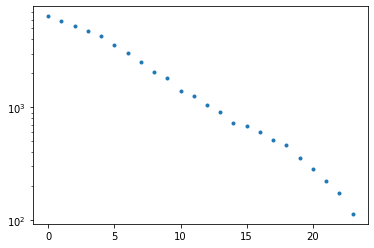

In [42]:
plt.semilogy(y,'.')